## Examination and plotting of specific genes from RNA seq data

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import StandardScaler
%matplotlib inline

#### General parameters

In [4]:
data_d = "/Users/erankotler/Google Drive/workspace/CMV/Data/RNAseq"
output_dir = "/Users/erankotler/Google Drive/workspace/CMV/ChIP_vs_Exp_output"

#### Functions

In [8]:
def plt_specific_genes(df, gene_list):
    n = len(gene_list)
    f, axs = plt.subplots(nrows=n, ncols=1, sharex=True, figsize=(5,2*n))
    sns.set_style("white")
    for i, gene in enumerate(gene_list):
        ser = df.loc[gene].to_frame()
        ser.loc[["1_Luc_Mock","2_Luc_Mock","3_Luc_Mock"], "Group"] = "Luc Mock"
        ser.loc[["4_Luc_CMV","5_Luc_CMV","6_Luc_CMV"], "Group"] = "Luc CMV"
        ser.loc[["7_IE1wt_CMV","8_IE1wt_CMV","9_IE1wt_CMV"], "Group"] = "IE1wt CMV"
        ser.loc[["10_IE1dCTD_CMV","11_IE1dCTD_CMV","12_IE1dCTD_CMV"], "Group"] = "IE1dCTD CMV"
    #     axs[i].axhline(y=0, c='k', linewidth=0.5)
    #     sns.barplot(x="Group", y=gene, data=ser, ax=axs[i], capsize=0.3, errcolor='k', errwidth=0.5, palette="Blues")
    #     sns.boxplot(x="Group", y=gene, data=ser, ax=axs[i], palette="Blues")
        sns.swarmplot(x="Group", y=gene, data=ser, ax=axs[i])
        axs[i].set_ylabel(gene + (" log10(TPM)"))
        axs[i].set_xlabel('')
    
    plt.tight_layout()
    return f

#### load human gene expression data (TPM) and log-transofrm


In [29]:
human_tpms = pd.read_csv(os.path.join(data_d,"TPMs_kallisto_human_genes_convertedNames.csv"))
human_tpms.index = human_tpms["Gene"]
human_tpms.drop(["Gene","Unnamed: 0"], axis=1, inplace=True)
d = np.log10(human_tpms+0.0001) 

#### Plot specific genes

In [13]:
genes_to_plot = ["IFNA1", "IFNA2", "IFNB1", "IFNG", "IFNL1", "STAT1", "STAT2", "STAT3", 
                 "IFNAR1", "IFNAR2","FAS", "IL6", "CCL5", "CXCL14", "IRF1", "IRF3", "IRF4", "IRF5",
                 "TMEM173", "IKBKG", "NFKB1", "NFKB2", "NFKBIA", "FOS", "FOSB", "JUN", "JUNB", "TP53"]

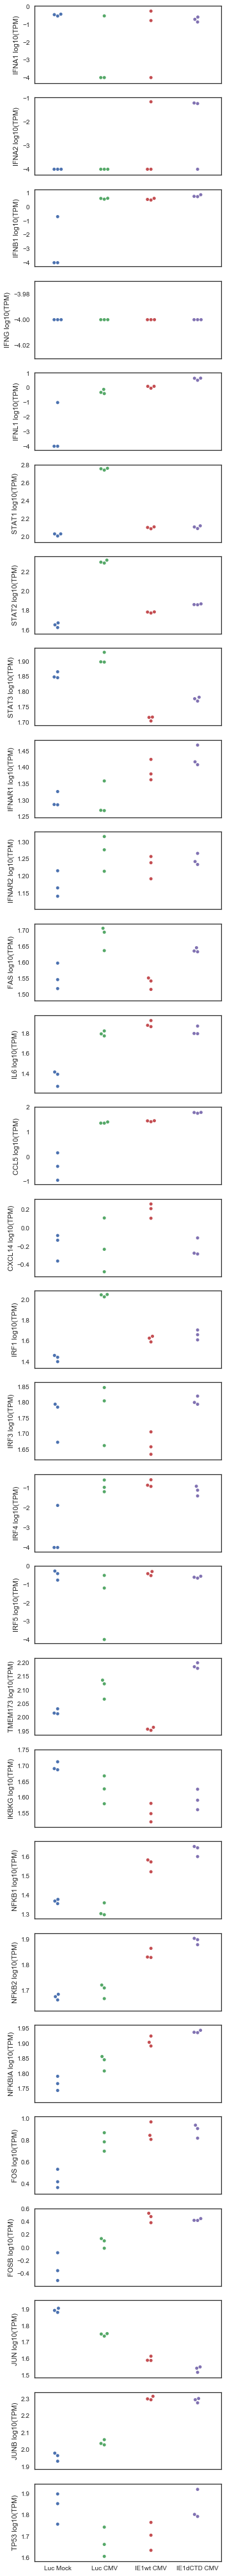

In [14]:
f = plt_specific_genes(d, genes_to_plot)
plt.savefig(os.path.join(output_dir, "Interesting_genes_RNAseq.pdf"))
plt.show()